In [2]:

path = kagglehub.dataset_download("atomicd/retail-store-inventory-and-demand-forecasting")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/retail-store-inventory-and-demand-forecasting


In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import plotly.express as px
import kagglehub

In [ ]:
# List all files in the dataset folder to find the actual CSV file names
print(os.listdir(path))

In [19]:
df = pd.read_csv(os.path.join(path, 'sales_data.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [12]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


## Target Variable

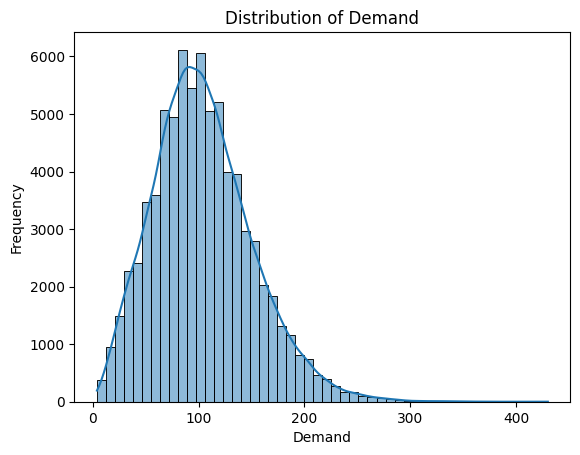

In [8]:
sns.histplot(df['Demand'],bins = 50,kde= True)
plt.title("Distribution of Demand")
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.show()

## Correlation Heatmap

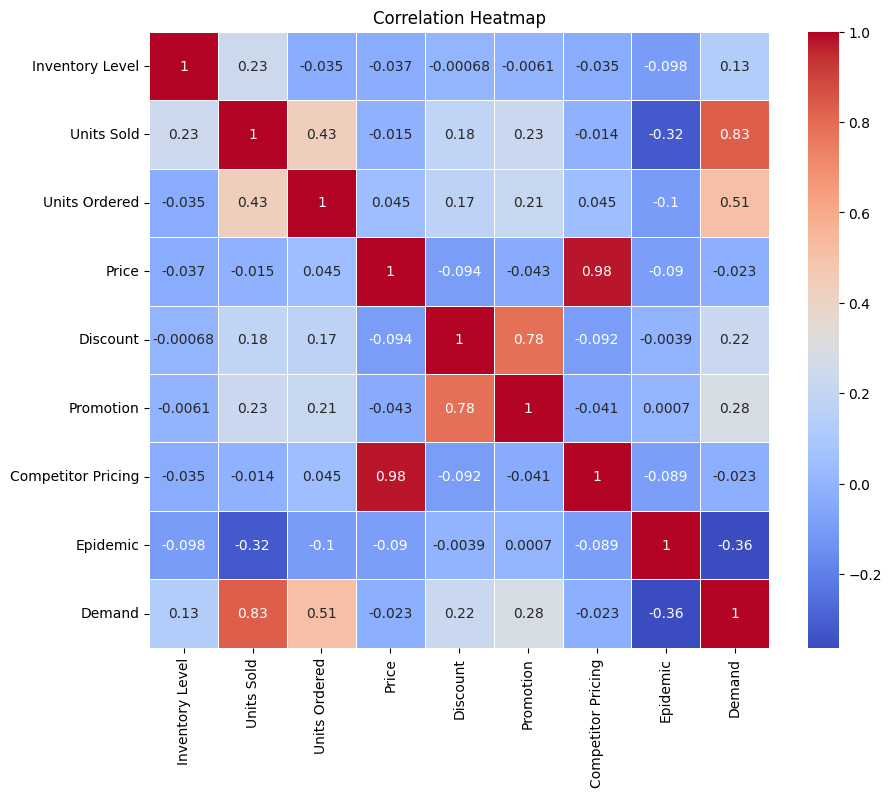

In [11]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
# Calculate correlation on the numerical DataFrame
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

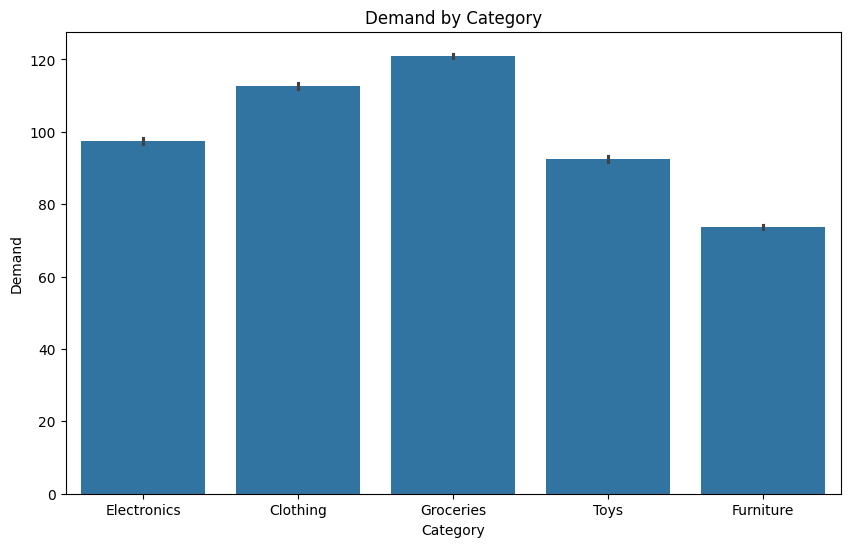

In [29]:
# Demand by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Demand', data=df)
plt.title('Demand by Category')
plt.xlabel('Category')
plt.ylabel('Demand')
plt.show()

In [16]:
# Calculate the mean demand for each category
mean_demand_by_category = df.groupby('Category')['Demand'].mean()

# Display the result
print(mean_demand_by_category)

Category
Clothing       112.619737
Electronics     97.482018
Furniture       73.581140
Groceries      120.976447
Toys            92.606955
Name: Demand, dtype: float64


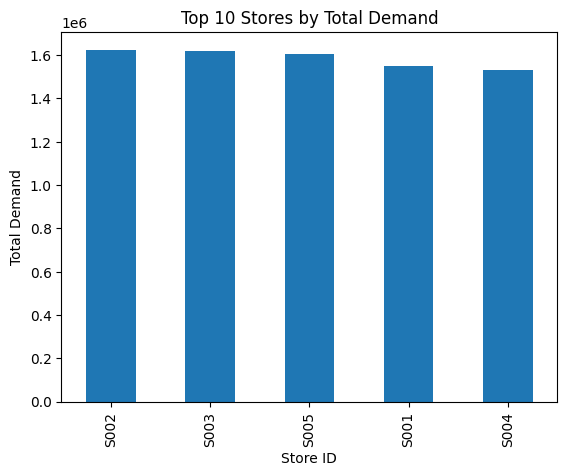

In [30]:
top_stores = df.groupby('Store ID')['Demand'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar')
plt.title("Top 10 Stores by Total Demand")
plt.ylabel("Total Demand")
plt.show()

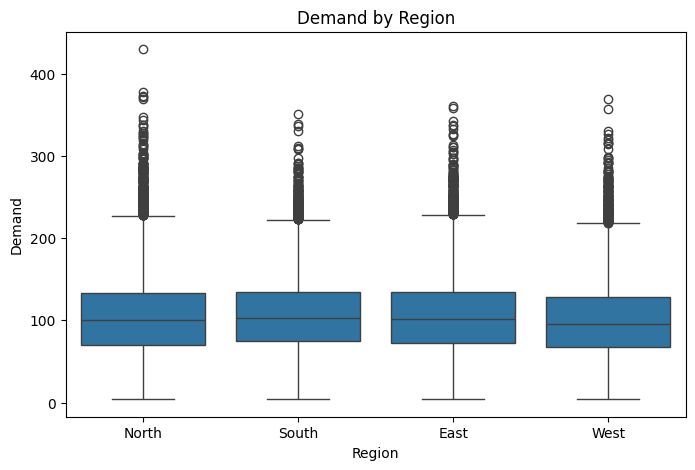

In [31]:
# Average Demand by Region
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Region', y='Demand')
plt.title("Demand by Region")
plt.show()


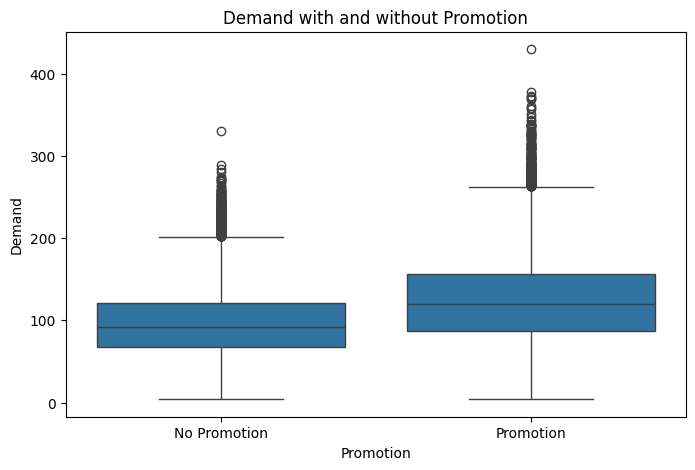

In [32]:
# Promotion vs Demand
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Promotion', y='Demand')
plt.title("Demand with and without Promotion")
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()


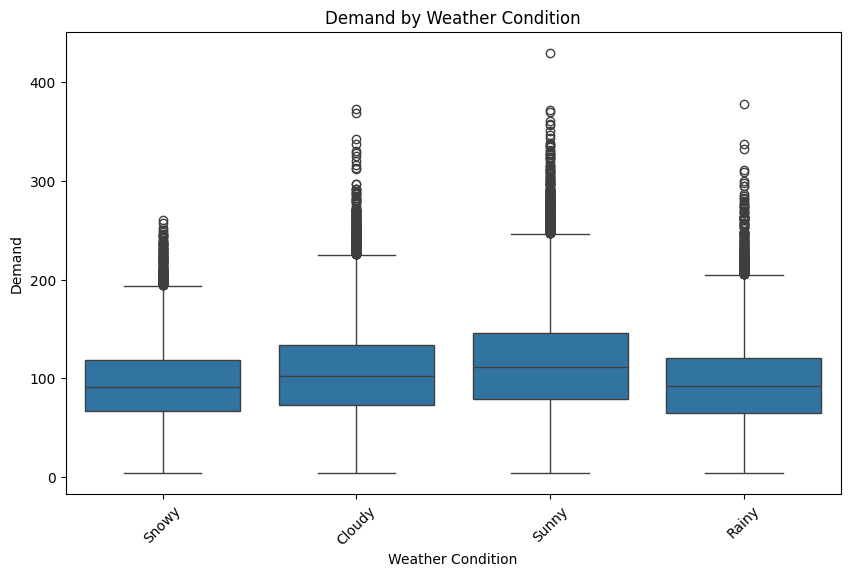

In [33]:
# Weather Condition vs Demand
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Weather Condition', y='Demand')
plt.title("Demand by Weather Condition")
plt.xticks(rotation=45)
plt.show()

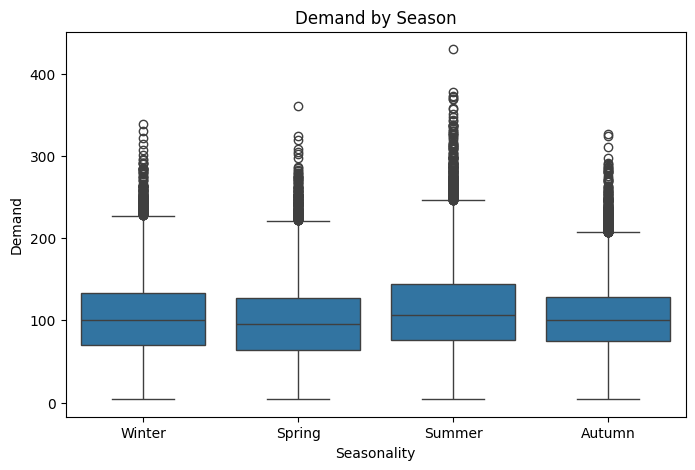

In [34]:
# Seasonality vs Demand
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Seasonality', y='Demand')
plt.title("Demand by Season")
plt.show()